# Gradient descent: dependence on the condition number

Consider the function from two variables:

$$
f(x_1, x_2) = x_1^2 + kx_2^2,
$$

where $k$ is a parameter. It is clearly quadratic function $f(x) = x^\top A x$, where the matrix $A = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}$.

In [ ]:
def f(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    
    x_1, x_2 = x
    return x_1**2 + k*x_2**2

def df(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    return np.array([2*x[0], 2*k*x[1]])

Постройте график количества итераций, необходимых для сходимости алгоритма наискорейшего спуска (до выполнения условия $\|\nabla f(x_k)\| \leq \varepsilon = 10^{-7}$) в зависимости от значения $k$. Рассмотрите интервал $[10^{-3}; 10^{3}]$ (будет удобно использовать функцию `ks = np.logspace(-3,3))` и строить график по оси абсцисс в логарифмическом масштабе `plt.semilogx()` или `plt.loglog()` для двойного лог. масштаба.

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import pyplot as plt

def plot_3d_function(x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1 = x1.max()
    up_lim_2 = x2.max()
    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2), *f_params) # evaluation of the function on the grid

    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)
    #===============
    # First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
    cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)


    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)
    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu, origin = "lower", extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)

    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')
    plt.show()


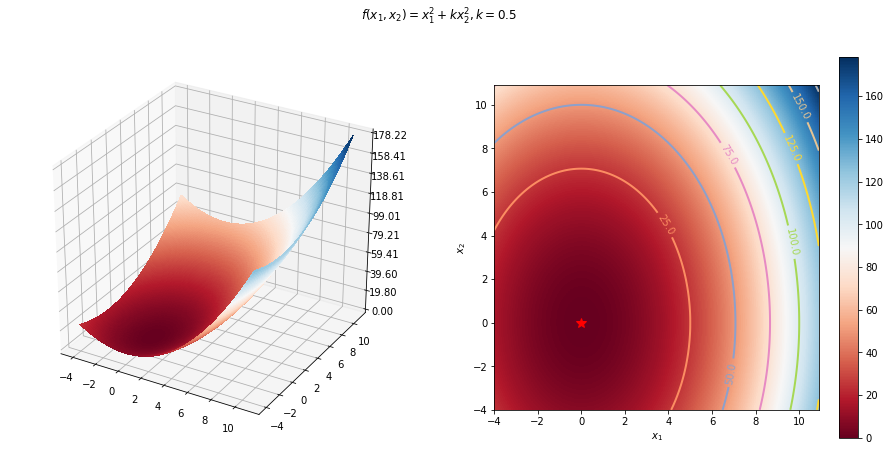

In [ ]:
up_lim = 11
low_lim = -4
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
k=0.5
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'
plot_3d_function(x1, x2, f, title, k, minima=[0,0])

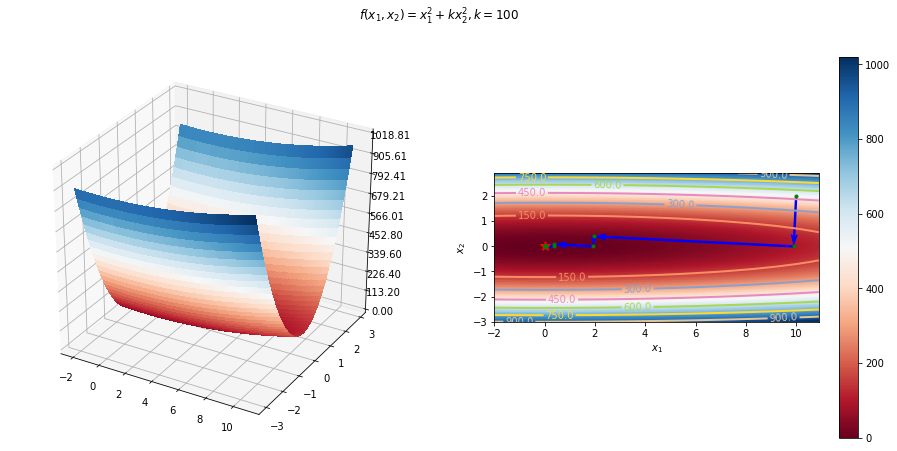

In [ ]:
from scipy.optimize import minimize_scalar
def steepest_descent(x_0, f, df, *f_params, df_eps = 1e-2, max_iter = 1000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x, *f_params)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, *f_params), *f_params))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, *f_params)
        iterations.append(x)
    #print('Finished with', len(iterations), 'iterations')
    return iterations
x_0 = [10,2]
k = 100
iterations = steepest_descent(x_0, f, df, k, df_eps = 1e-7)
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'
x1 = np.arange(-2, 11, 0.1)
x2 = np.arange(-3, 3, 0.1)
plot_3d_function(x1, x2, f, title, k, minima=[0,0], iterations = iterations)


In [ ]:
from functools import partial
ks1= np.logspace(-5, 5, 300)
x_0 = [-0.5, -3]

def my_steepest_descent(k, x_0, f, df, df_eps = 1e-7, max_iter = 1000):
    iterations = np.array(x_0)
    x = x_0
    while np.linalg.norm(df(x, k)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, k), k))
        alpha_opt = res.x
        # alpha_opt = 0.1
        x = x - alpha_opt * df(x, k)
        iterations = np.vstack((iterations, x))
    return iterations.shape[0], f(iterations[-1])

partial_descent1 = partial(my_steepest_descent, x_0=x_0, f=f, df=df)



iter_count1 = []
for k in ks1:
    num_iter, x_f = partial_descent1(k)
    if np.linalg.norm(x_f) > 1e-3:
        print(f"No convergence at level of 1e-3 on parameter k = {k}")
    iter_count1.append(num_iter)

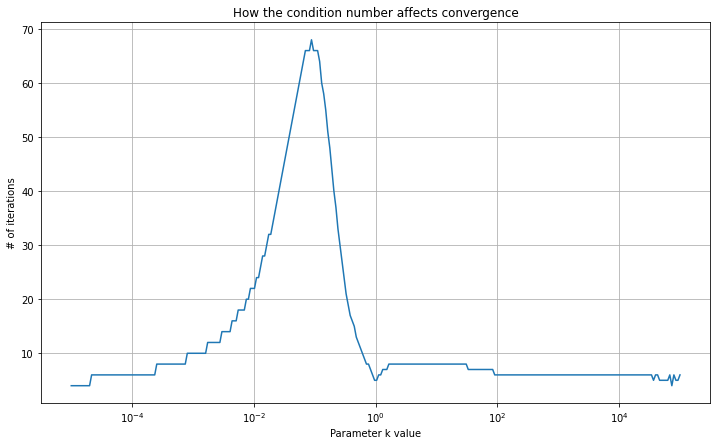

In [ ]:
plt.figure(figsize = (12, 7))
plt.semilogx(ks1, iter_count1)
plt.xlabel("Parameter k value")
plt.ylabel("# of iterations")
plt.grid(which = 'both')
plt.title('How the condition number affects convergence')
plt.show()